# Red Wine Quality Prediction Project

## Project Description
The dataset is related to red variant of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

## Attribute Information
Input variables (based on physicochemical tests):\
1 - fixed acidity\
2 - volatile acidity\
3 - citric acid\
4 - residual sugar\
5 - chlorides\
6 - free sulfur dioxide\
7 - total sulfur dioxide\
8 - density\
9 - pH\
10 - sulphates\
11 - alcohol\
Output variable (based on sensory data):\
12 - quality (score between 0 and 10)


In [657]:
# import Libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
from scipy import stats 

import warnings
warnings.filterwarnings("ignore")

In [658]:
df= pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Red%20Wine/winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [659]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [660]:
# Check for any Duplicate Values
df.duplicated().sum()

240

In [661]:
# Check for any Null values
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

> ## Inital Observations
> - Dataset has 11 Indepedent variables with float dtype and 1 Dependent feature with integer dtype. 
> -  Dataset has 1599 entries [Rows]
> - The problem is a multiclass classification problem
> - Dataset has 240 duplicate rows which needs to be droped.
> - It doesnt have any Null values.

In [662]:
# Droping duplicate entries in the dataset 
df = df.drop_duplicates()

df.shape

(1359, 12)

Note : Now we have 1359 distinct rows in our dataframe.

# Lets look at the features individually

In [663]:
def numerical_plot(column):

    # Outliers
    plt.figure(figsize=(13.5,10))
    plt.subplot(2,1,1)
    sns.boxplot(df,x="quality",y=column,palette="Set1")
    plt.title(f"{column.title()} vs Quality Analysis",fontweight="black",size=25,pad=10,)
    
    # Skewness
    plt.subplot(2,1,2)
    sns.histplot(df,x=column,kde=True,hue="quality",palette="Set1")
    skew = df[column].skew()
    plt.title(f"Skewness of {column.title()} Feature is: {round(skew,3)}",fontweight="black",size=20,pad=10)
    plt.tight_layout()
    plt.show()

## *Fixed Acidity*

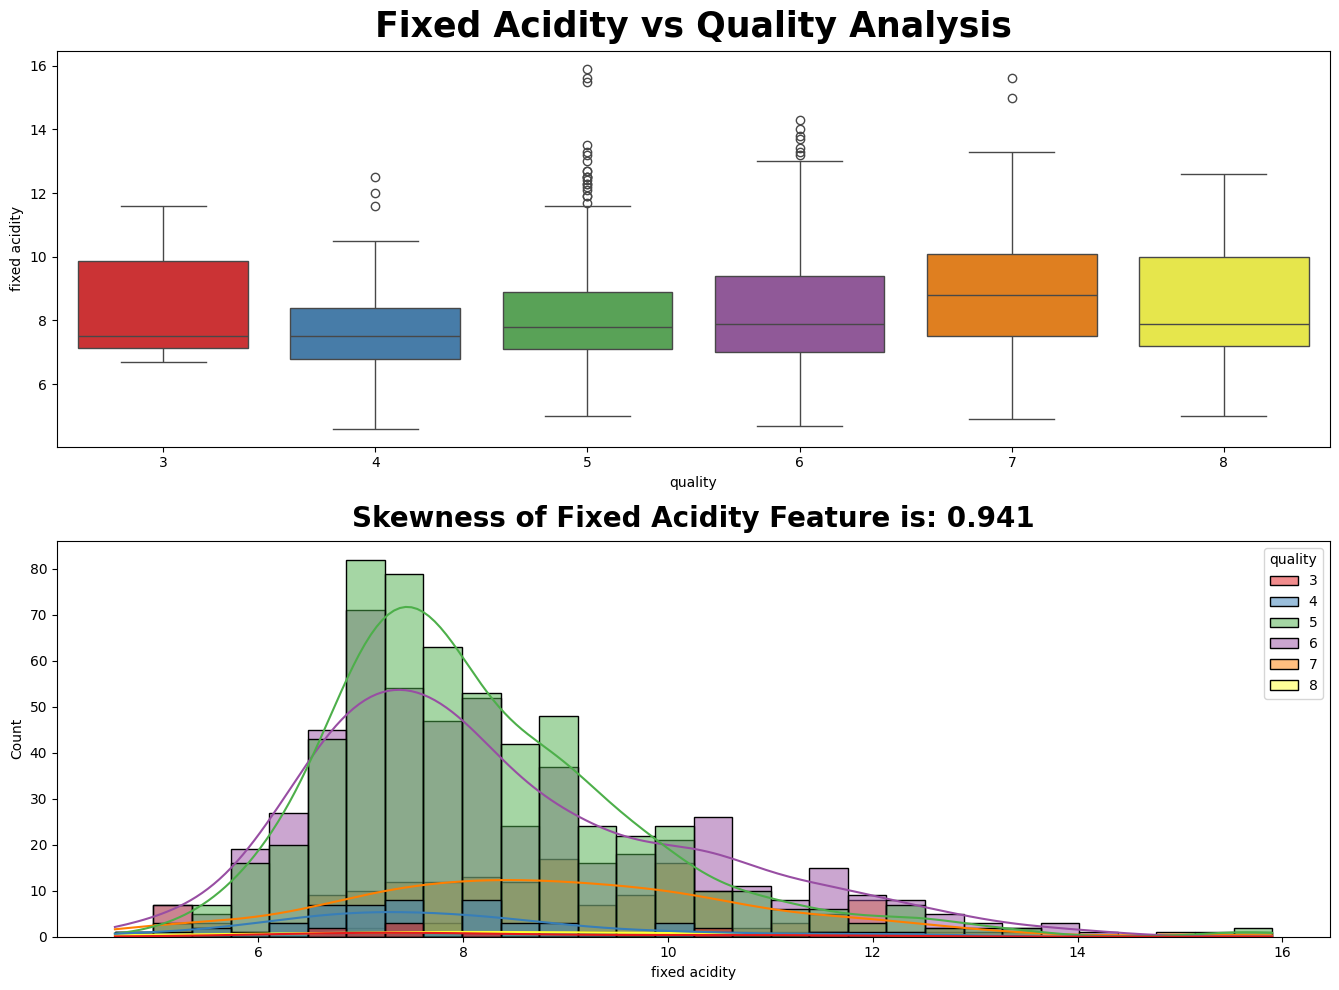

In [664]:
numerical_plot("fixed acidity")

---
> Obersvation:
> - Almost a normal distribution with a slight positive skewness of 0.941

---

## *Volatile Acidity*

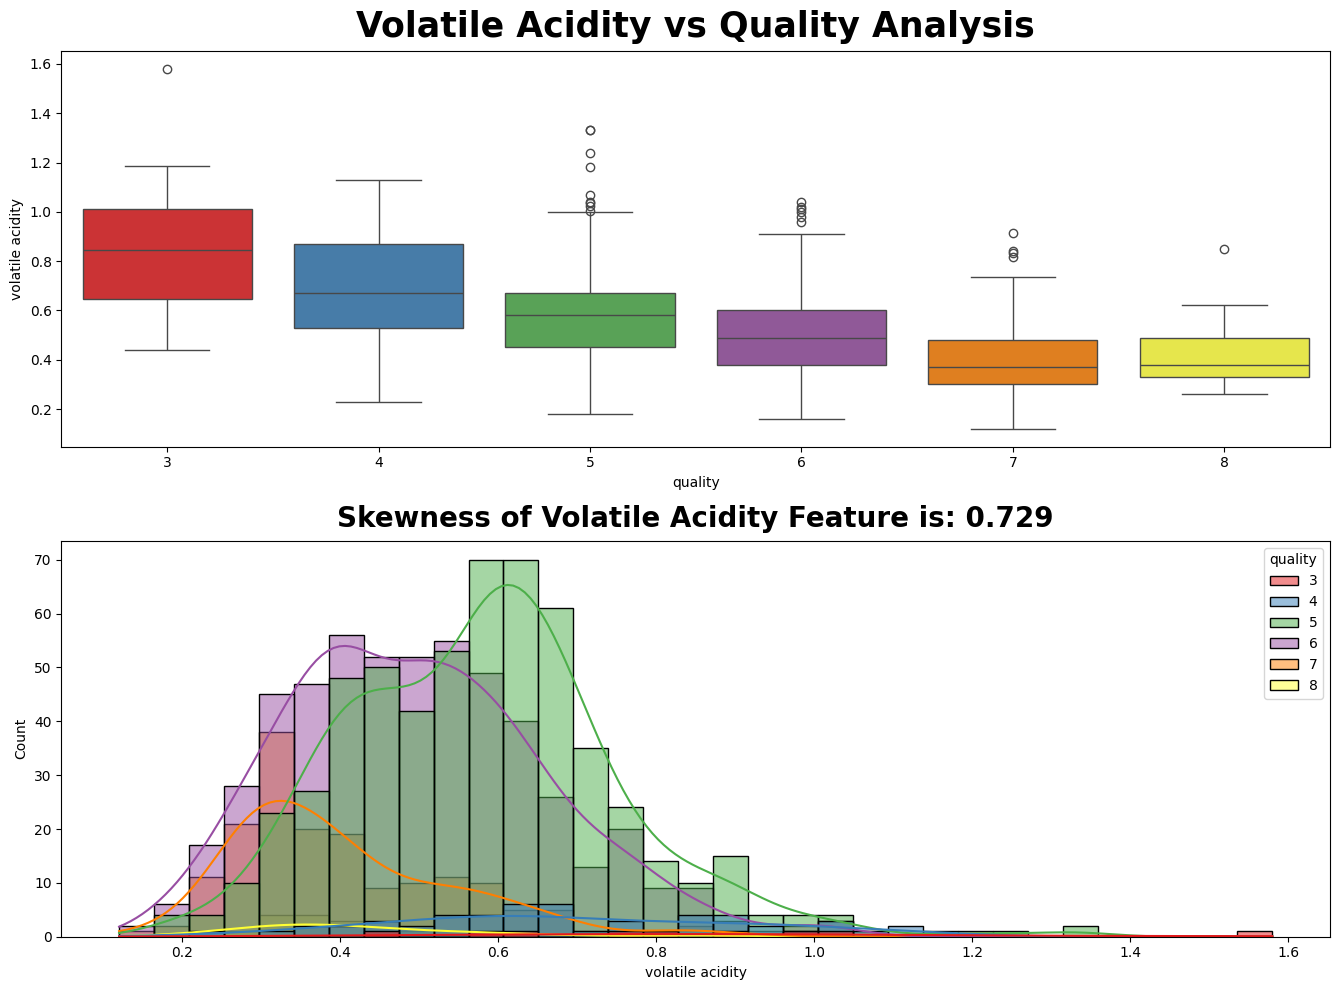

In [665]:
numerical_plot('volatile acidity')

---
> Obersvation:
> - Almost a normal distribution with a slight positive skewness of 0.729

---

## *Volalite Acidity*

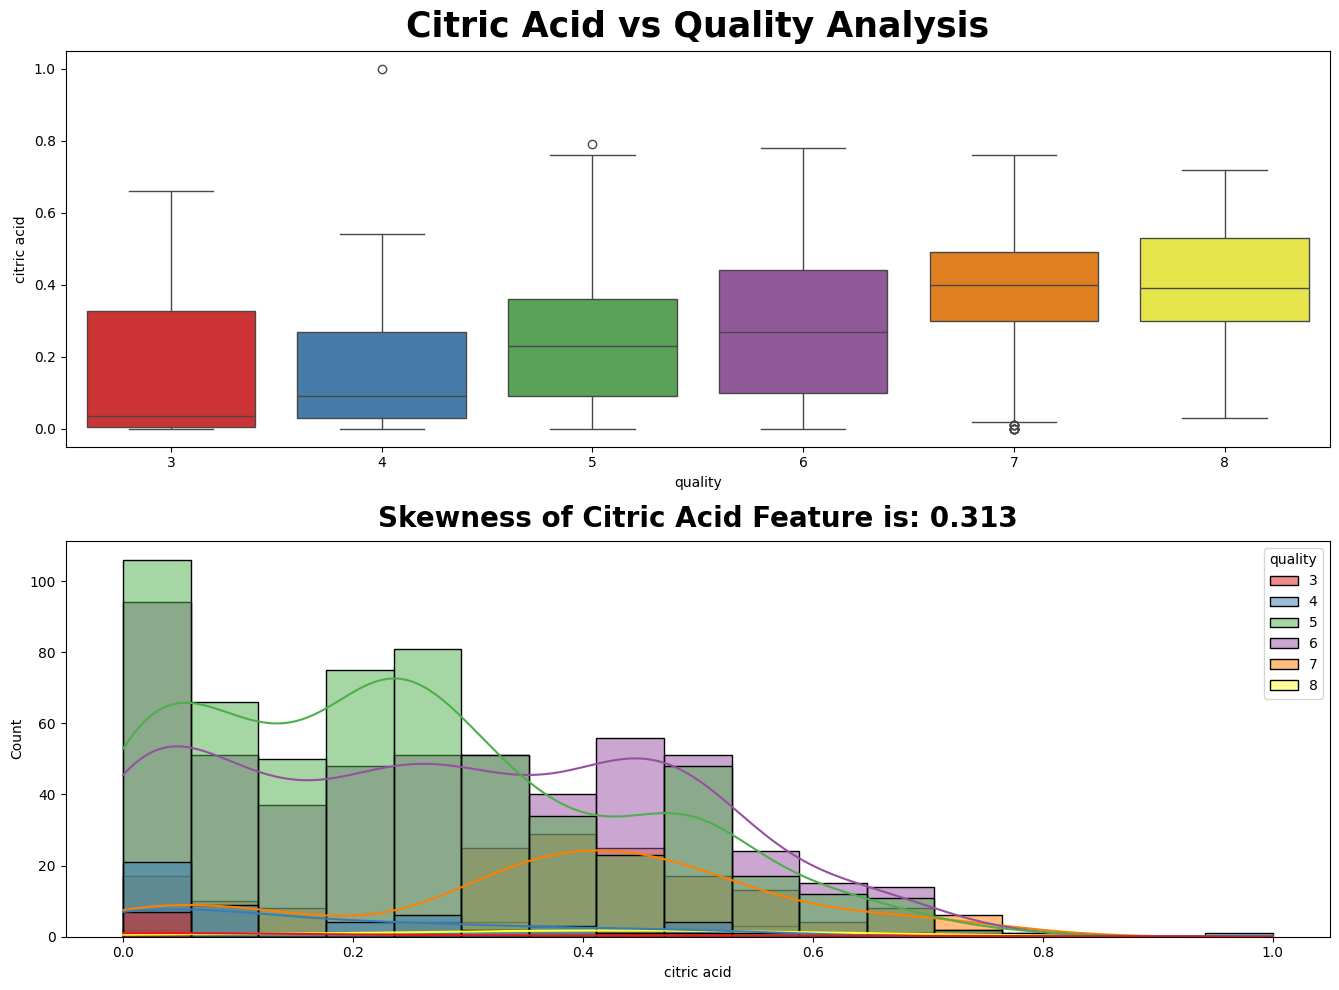

In [666]:
numerical_plot('citric acid')

---
> Obersvation:
> - Distribution with a very slight positive skewness of 0.313

---

## *Residual sugar*

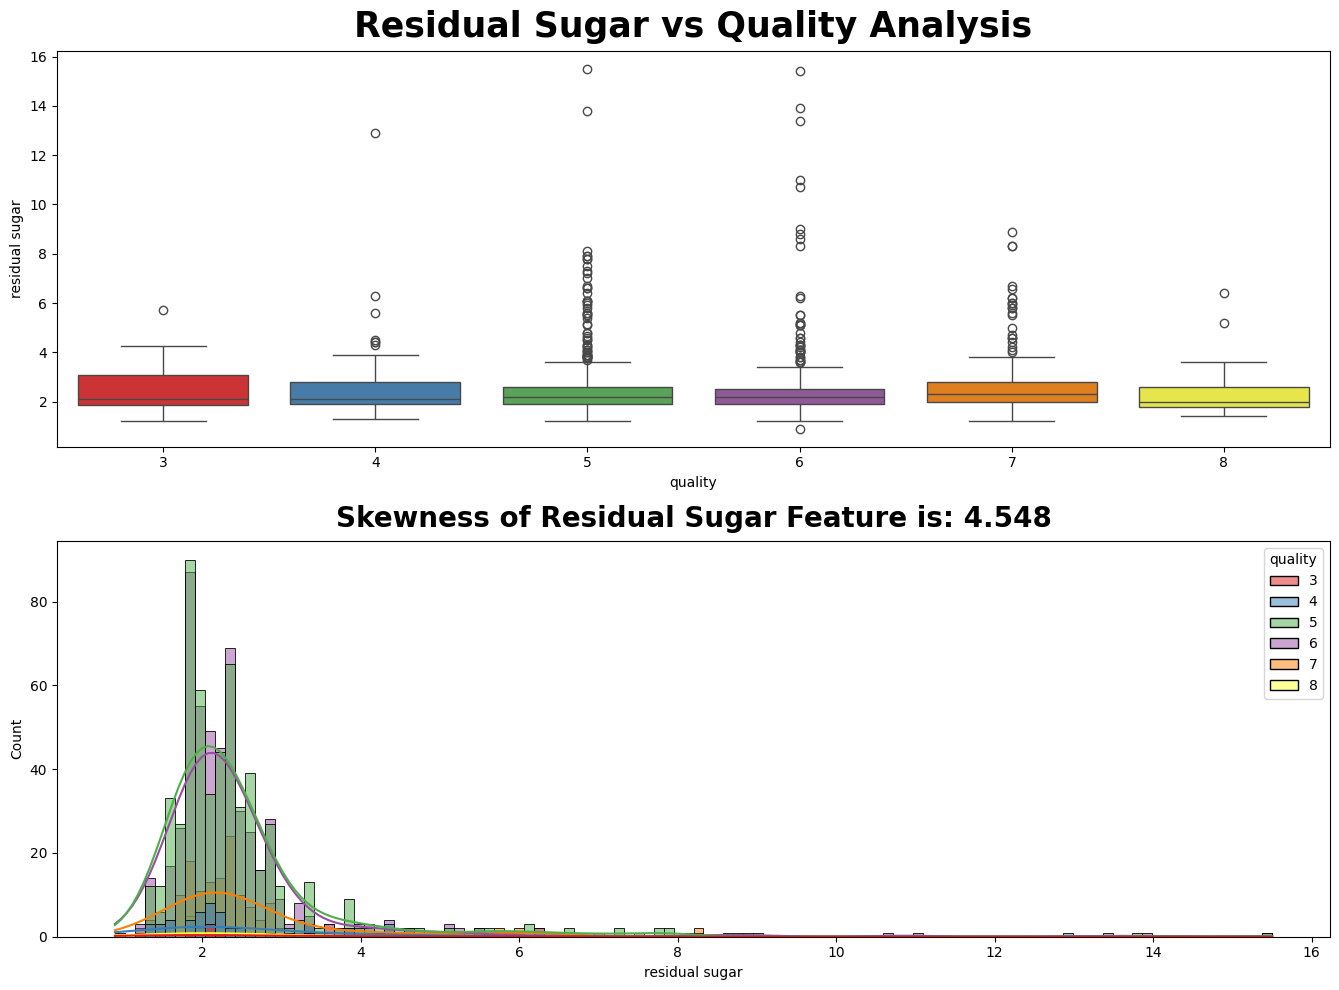

In [667]:
numerical_plot("residual sugar")

---
> Obersvation:
> - A normal distribution with highly positive skewness of 4.548
> - Visible outliers which needed to be handled
---

## *Chlorides*

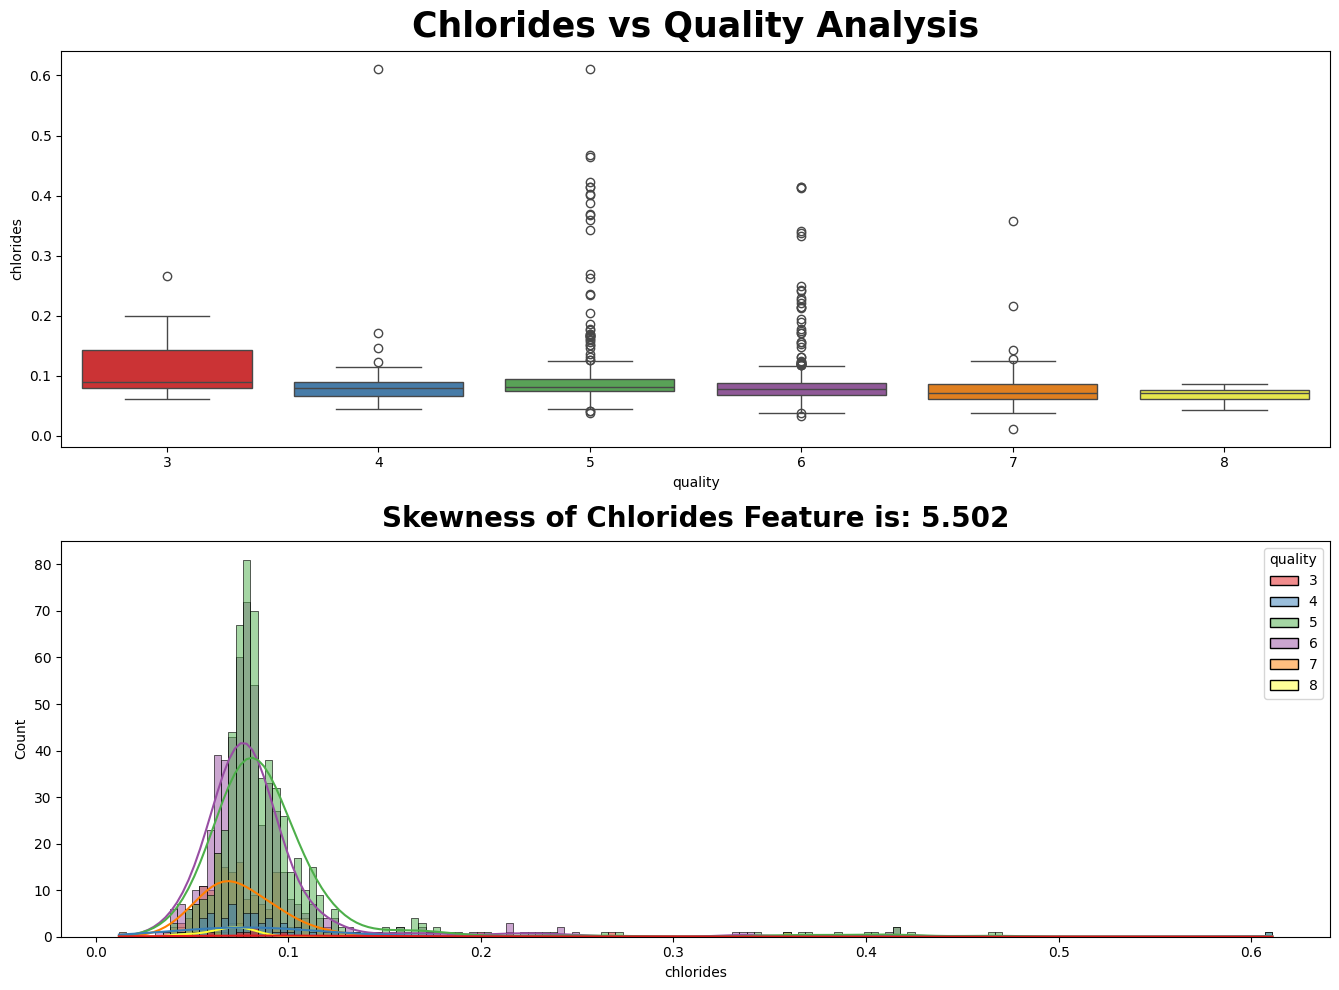

In [668]:
numerical_plot("chlorides")

---
> Obersvation:
> - A normal distribution with highly positive skewness of 5.502
> - Visible outliers which needed to be handled
---

## *Free Sulphur Chloride*

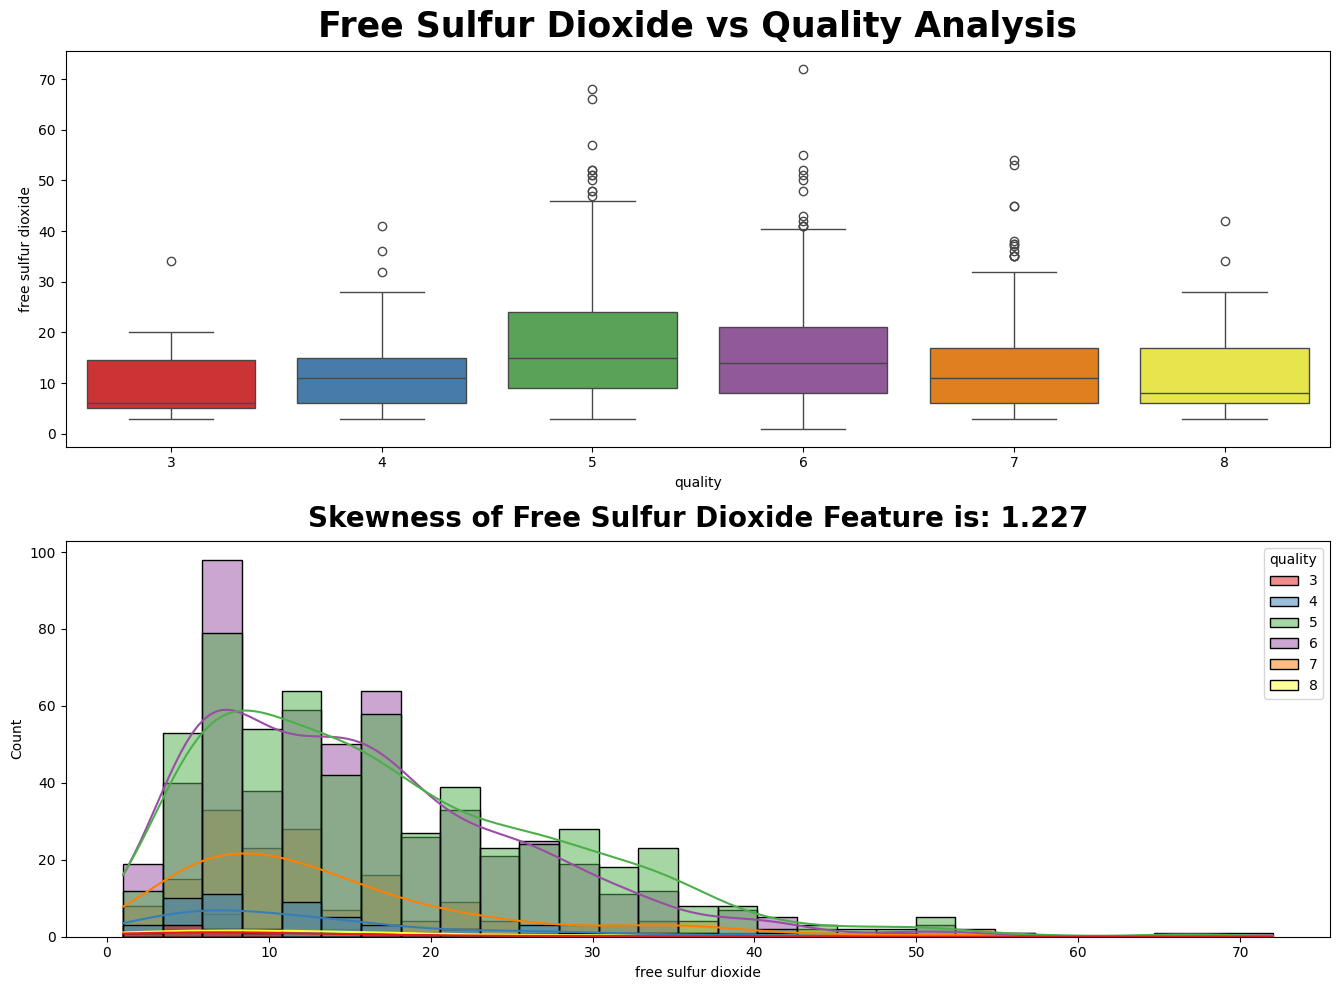

In [669]:
numerical_plot("free sulfur dioxide")

---
> Obersvation:
> - Almost a normal distribution with a slight positive skewness of 1.227

---

## *Total Sulfur Dioxide*

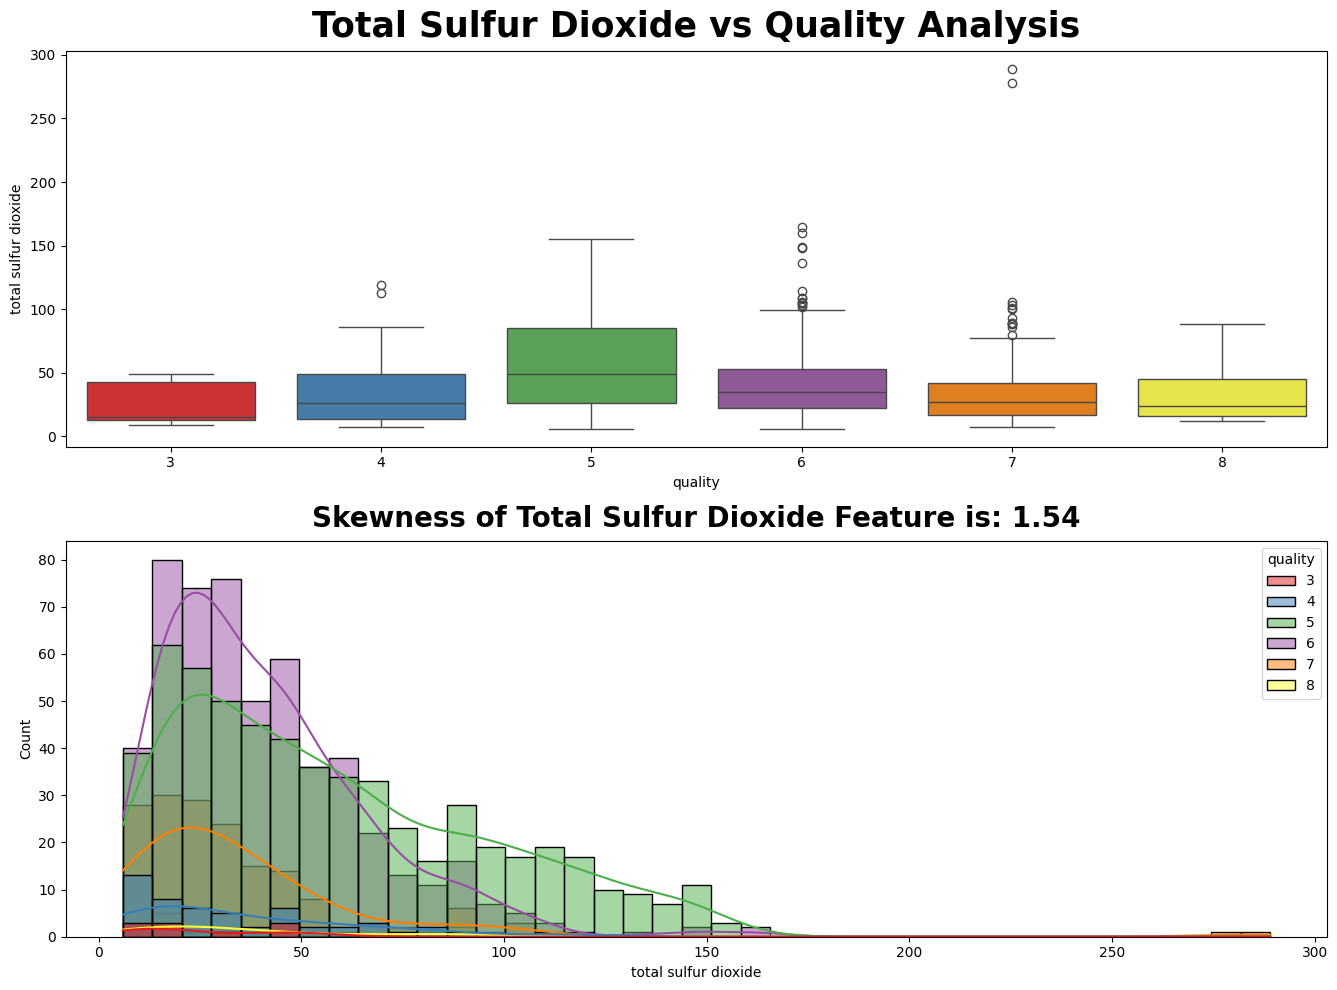

In [670]:
numerical_plot("total sulfur dioxide")

---
> Obersvation:
> - Almost a normal distribution with a positive skewness of 1.54

---

## *pH*

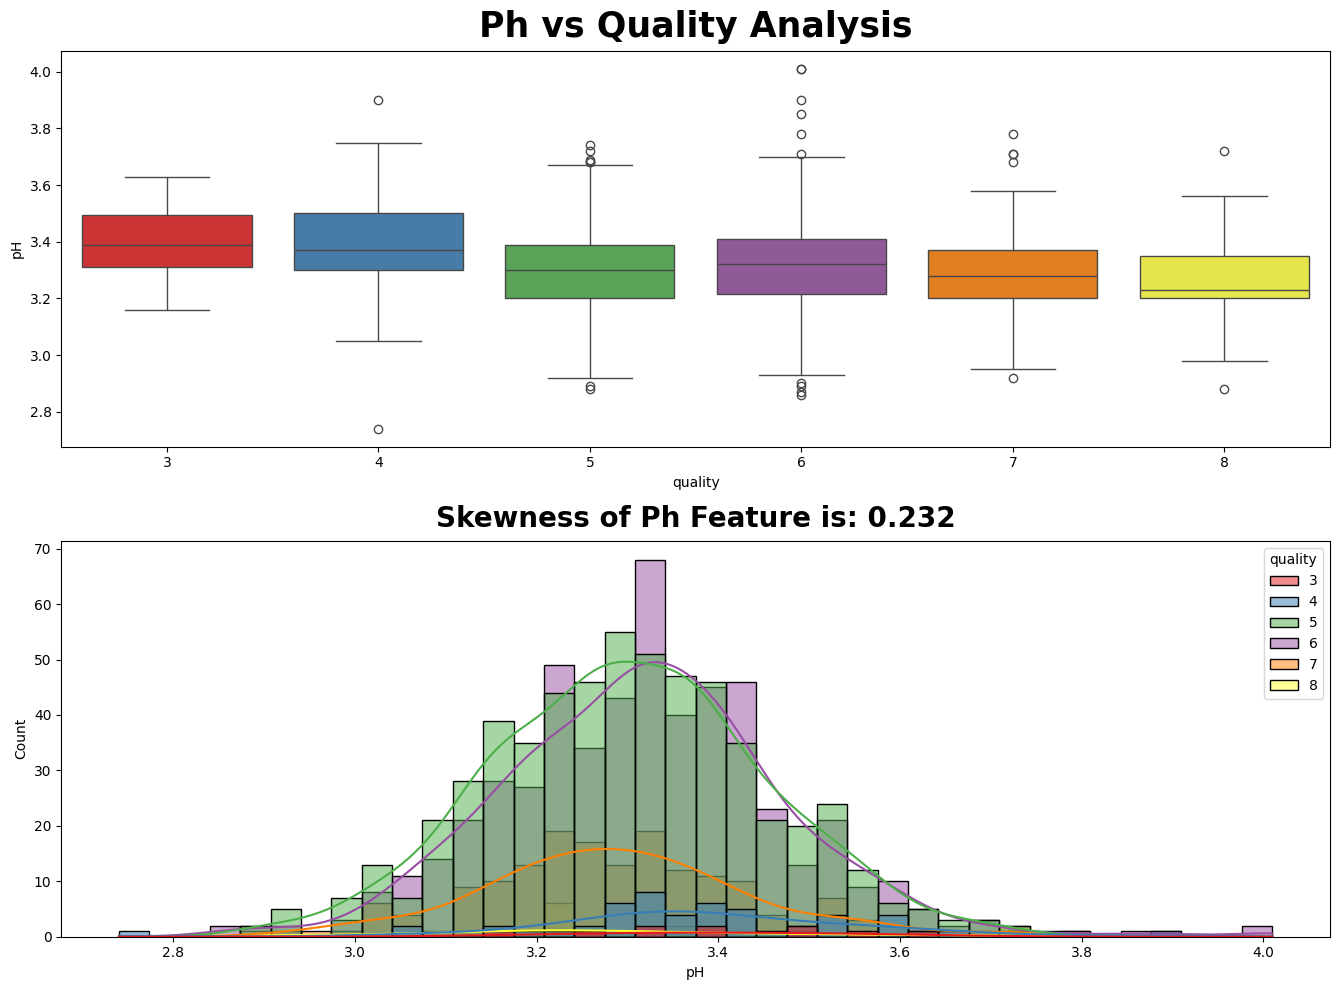

In [671]:
numerical_plot("pH")

---
> Obersvation:
> - Almost a normal distribution with a slight positive skewness of 0.232

---

## *Sulphates*

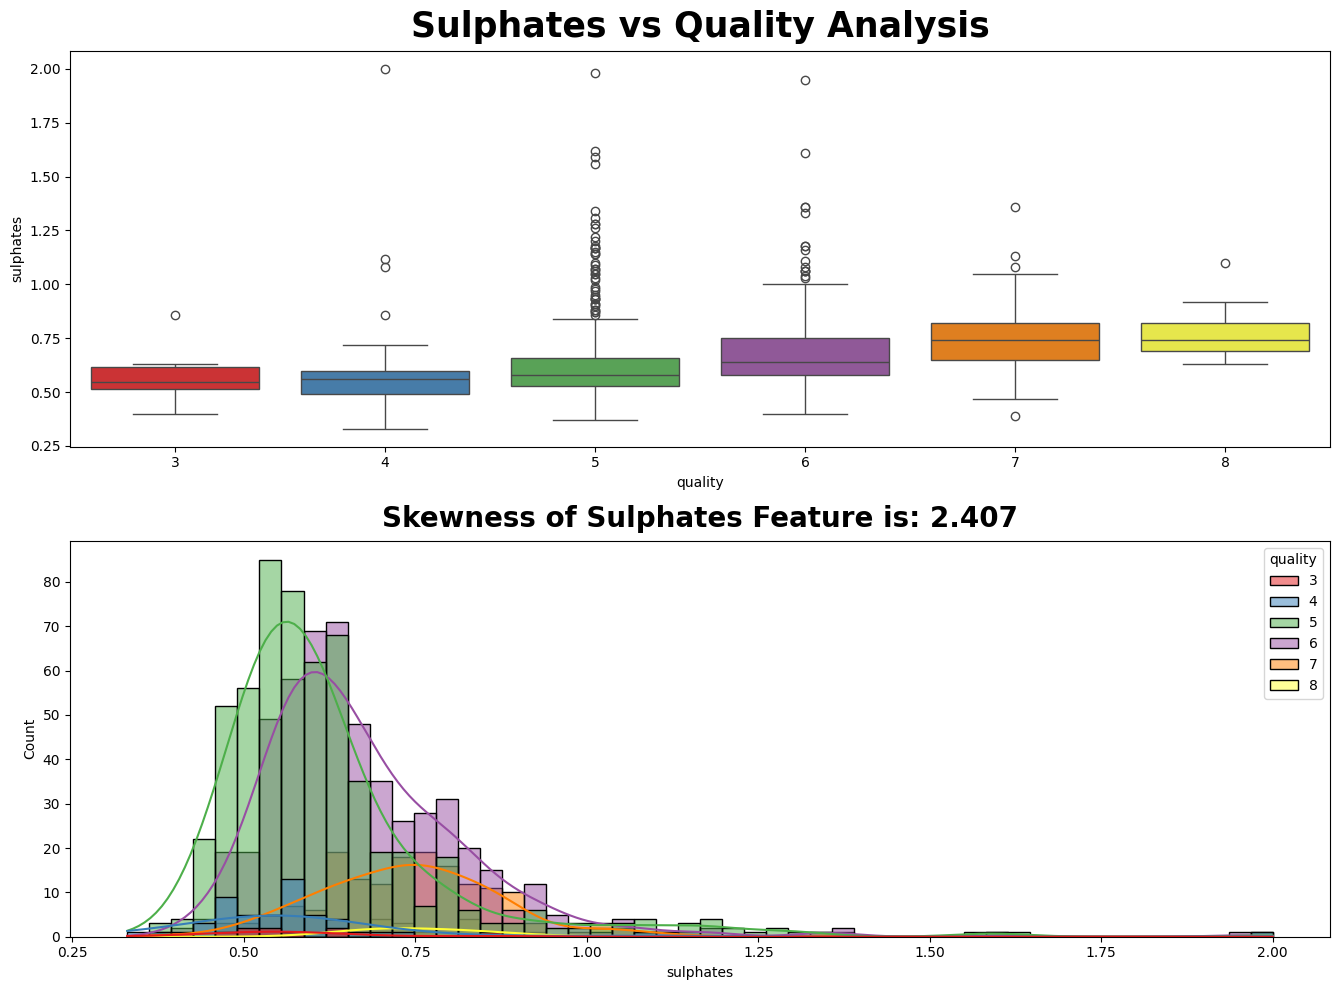

In [672]:
numerical_plot("sulphates")

---
> Obersvation:
> - Almost a normal distribution with a positive skewness of 2.407
> - Visible outliers which are needed to be handled

---

## *ALCOHOL*

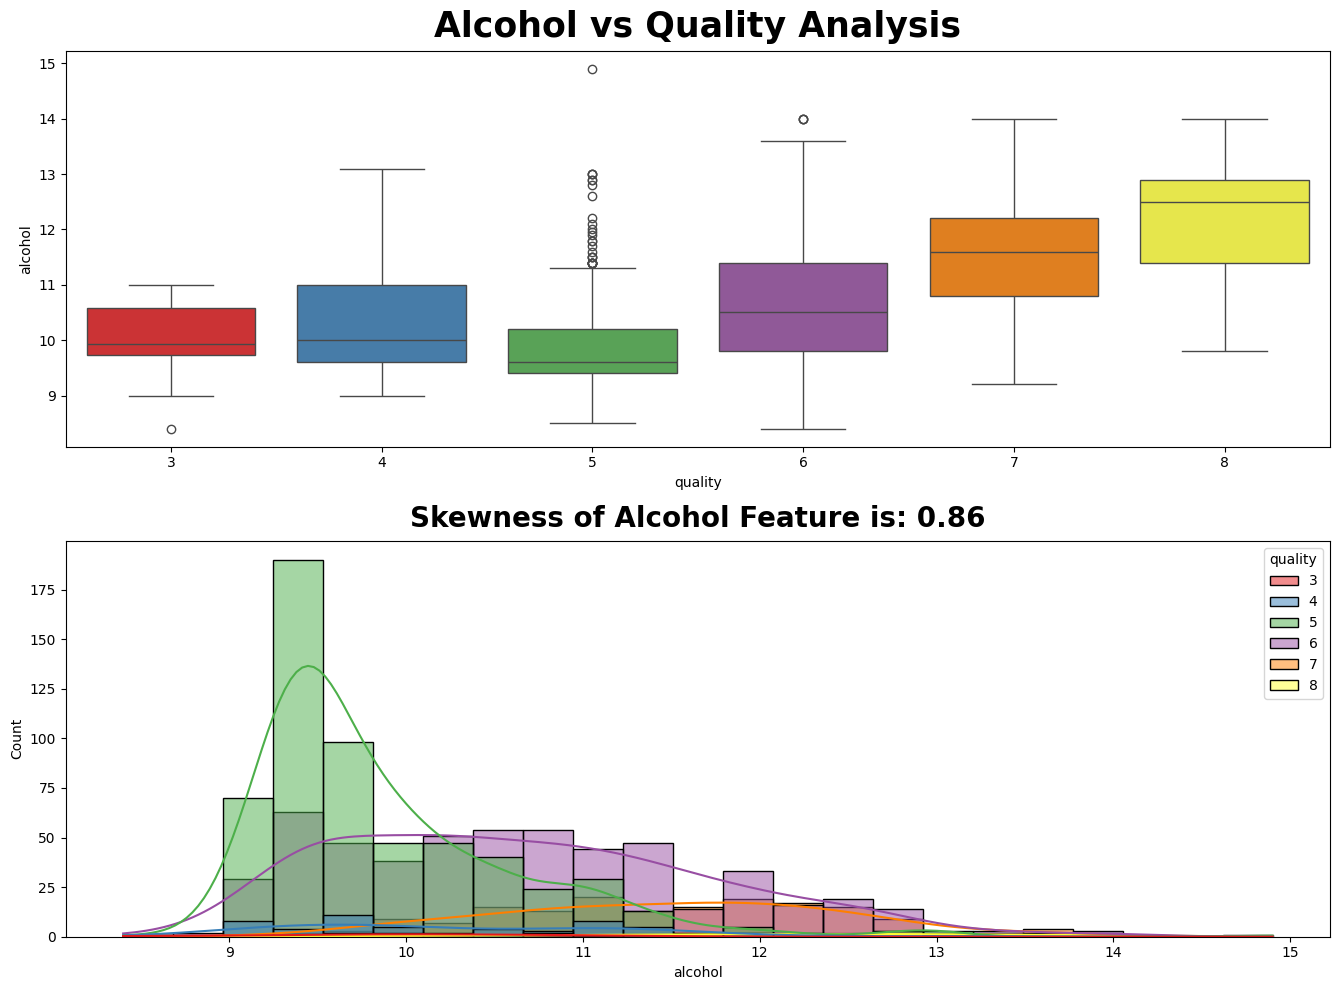

In [673]:
numerical_plot("alcohol")


---
> Obersvation:
> - Almost a normal distribution with a positive skewness of 0.86

---

# Relatinships between features


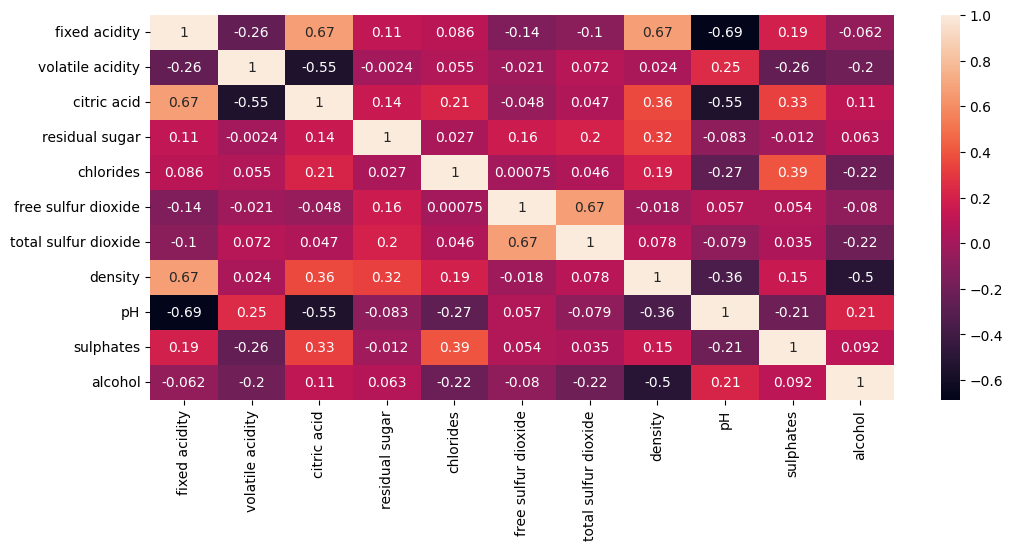

In [674]:
plt.figure(figsize=(12,5))
sns.heatmap(df.iloc[:,:-1].corr(), annot = True) # Not taking in quality column[ Target/Categorical ]
plt.show()

---
> ### Observations :
> 1.  `Fixed Acidity` has high correlation with citic acid , pH and density.
> 2.  `Volatile Acidity` has high correlation with citic acid.
> 3.  `Critic Acid has high` coorealtion with pH , volatile acidity and fixed acidity.
> 3.  `Free Sulfur Dioxide` is having high correlation with `total sulfur dioxide` and vice versa.
> 5.  `Density` has high correaltion with fixed acidity, alcohol.
> 6.  `pH` has high correlation with fixed acidity and critic acid.
> 7.  `alcohol` has high correlation with desnity.  
> Note: We cant drop these features.     

> *Residual Sugar , chlorides and sulphates* have absense of any kind of relatively high correalation with other features. 
---

# Data Preprocessing

### Handling skewness in  data

> Testing 3 transformation techniques
> - log
> - box cox
> - yeo-Johnson

In [675]:
from scipy import stats , special

columns = df.columns.tolist()
columns.remove("quality")
skewness_transformation = {}

for col in columns:
    transformed_log = np.log(df[col])                        # Log Transformation
    transformed_boxcox = special.boxcox1p(df[col],0.15)         # Box-Cox Transformation with lambda=0.15
    transformed_yeojohnson, _ = stats.yeojohnson(df[col])    # Yeo-Johnson Transformation
     
    # Create a dictionary for the skewness values of each transformation
    transformation_skewness = {
        "Log Transformation": stats.skew(transformed_log),
        "Box-Cox Transformation": stats.skew(transformed_boxcox),
        "Yeo Johnson Transformation": stats.skew(transformed_yeojohnson),
    }

    # Store the transformation skewness values for the column
    skewness_transformation[col] = transformation_skewness

In [676]:
result_df = pd.DataFrame.from_dict(skewness_transformation, orient='index')
result_df

,Log Transformation,Box-Cox Transformation,Yeo Johnson Transformation
fixed acidity,0.348419,0.488956,0.001881
volatile acidity,-0.330430,0.385526,0.008302
citric acid,NaN,0.114207,0.016544
residual sugar,1.763289,2.475999,-0.001713
chlorides,1.885558,5.004319,-0.061854
free sulfur dioxide,-0.219826,0.090191,-0.009888
total sulfur dioxide,-0.078074,0.165055,-0.003893
density,0.036798,0.041363,-0.002809
pH,0.039720,0.105560,-0.005001
sulphates,0.960399,1.726855,0.014621


- We will go ahead with yeo Johnson Transformation as it has given better result among the three

### Applying Yeo-Johnson Transformation and normalizating using Z-score on the dataset

In [677]:
for col in columns:
    transformed_col,_ = stats.yeojohnson(df[col])
    df[col] = transformed_col

# z score normalization
df.iloc[:,:-1] = stats.zscore(df.iloc[:,:-1])
    

### checking the distribution after normalization

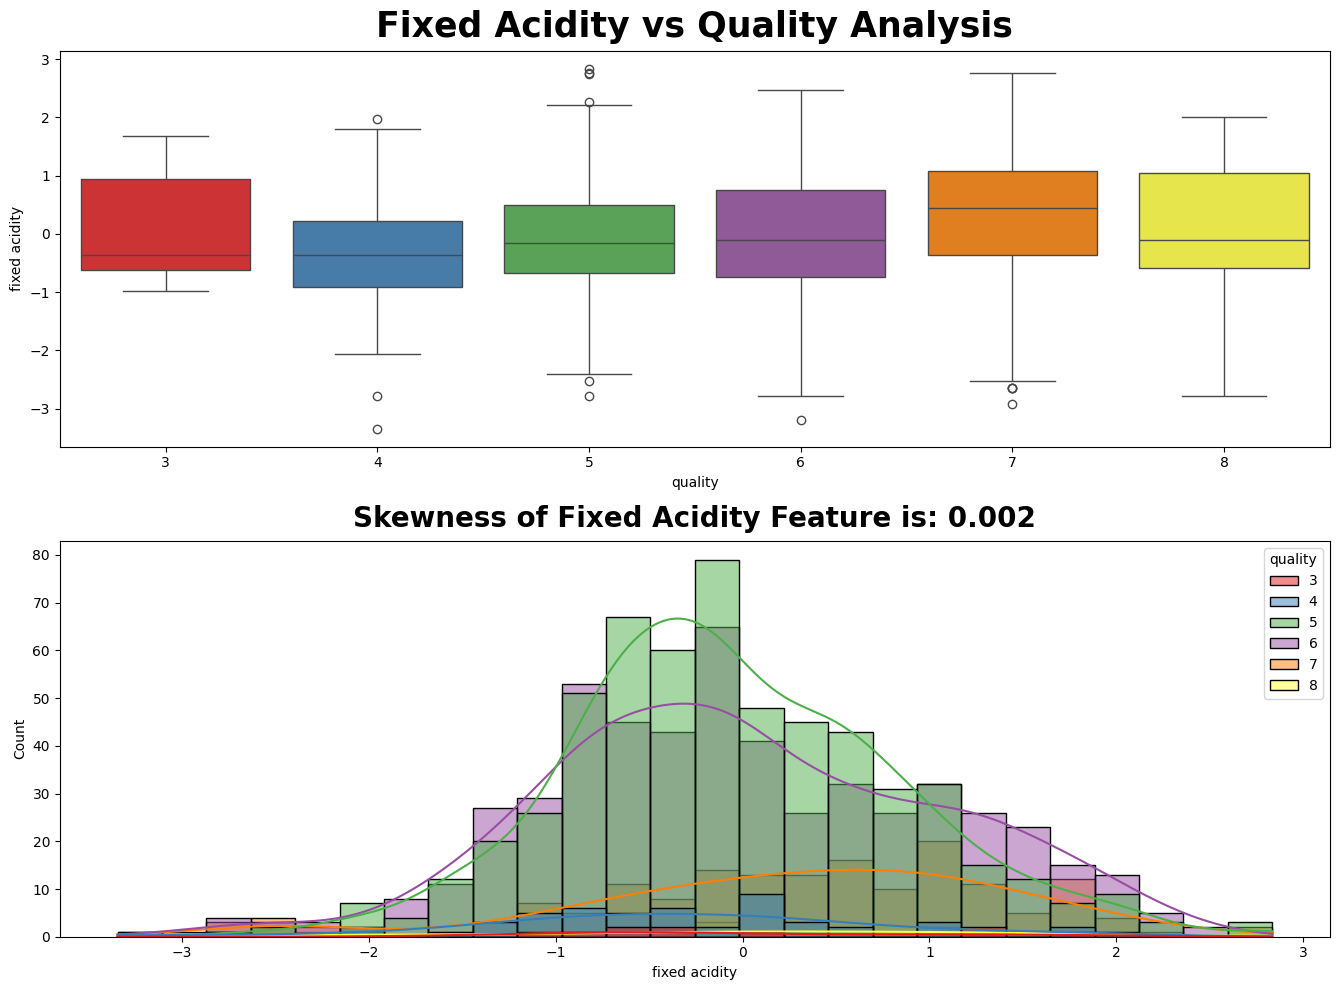

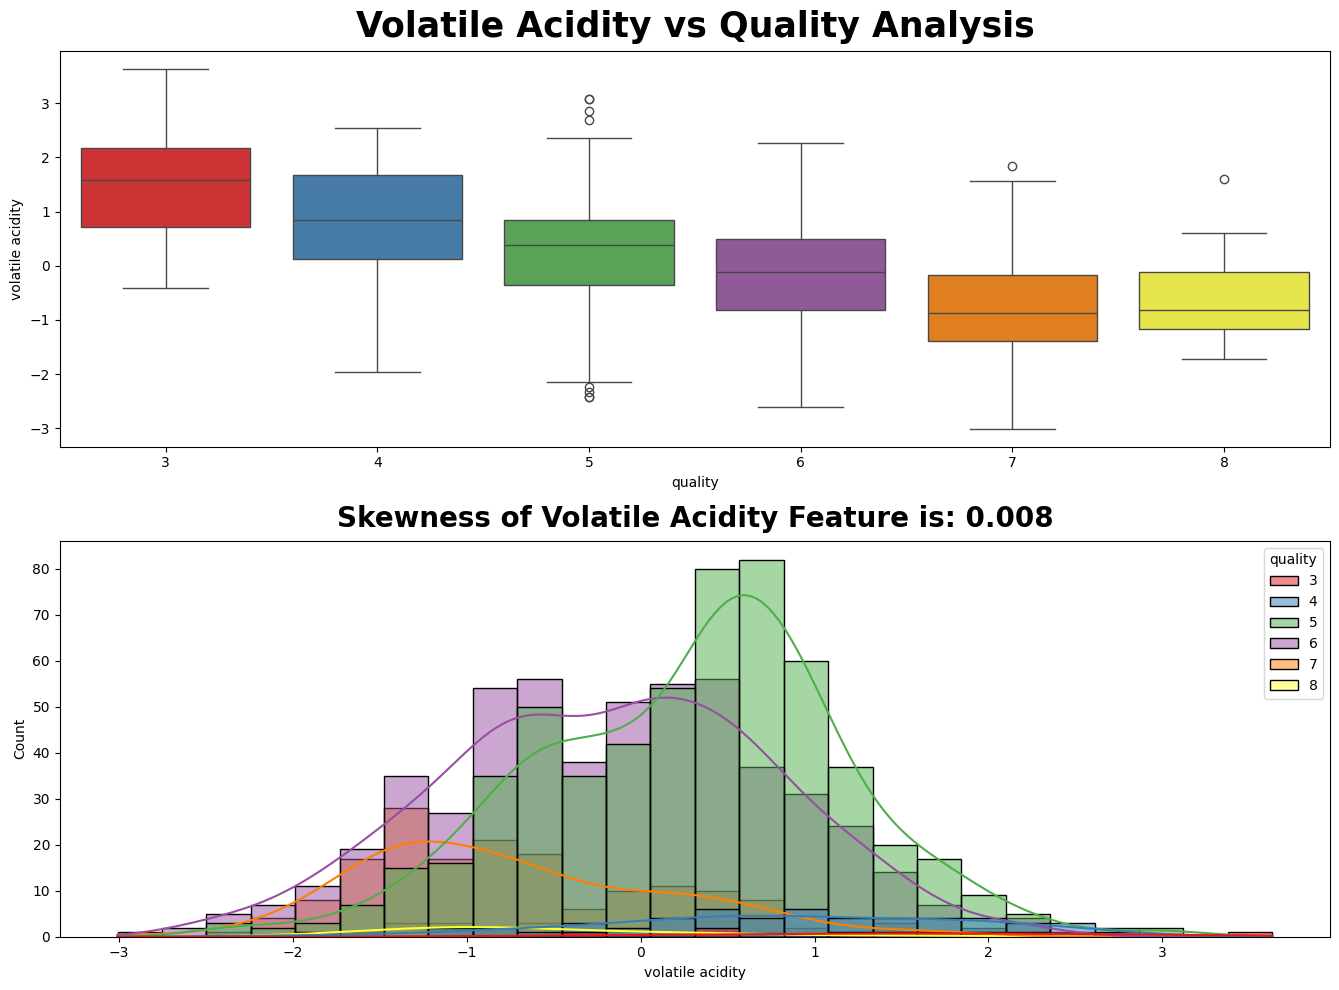

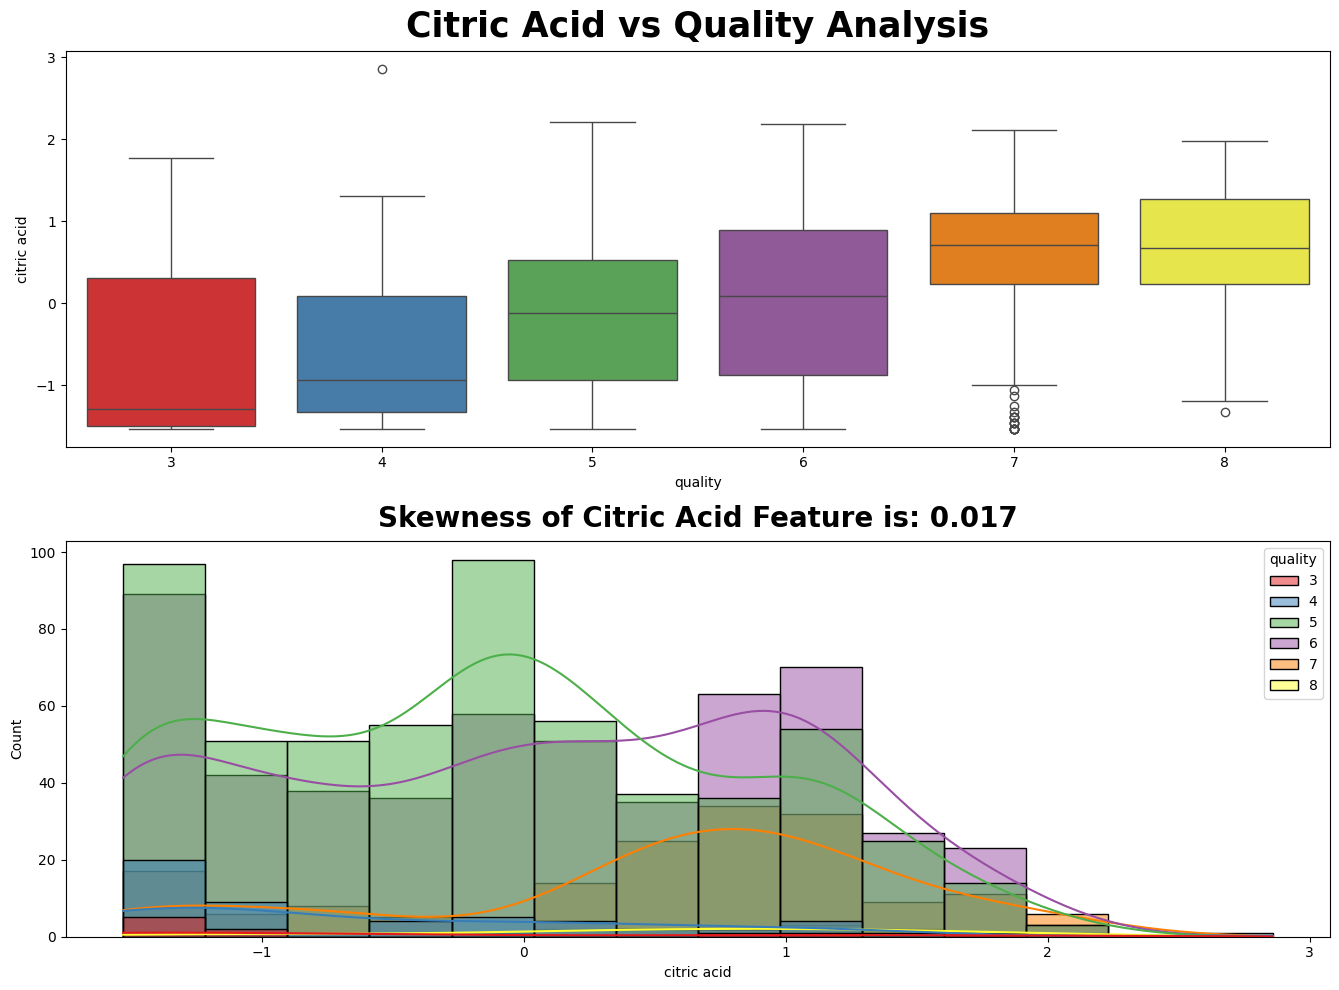

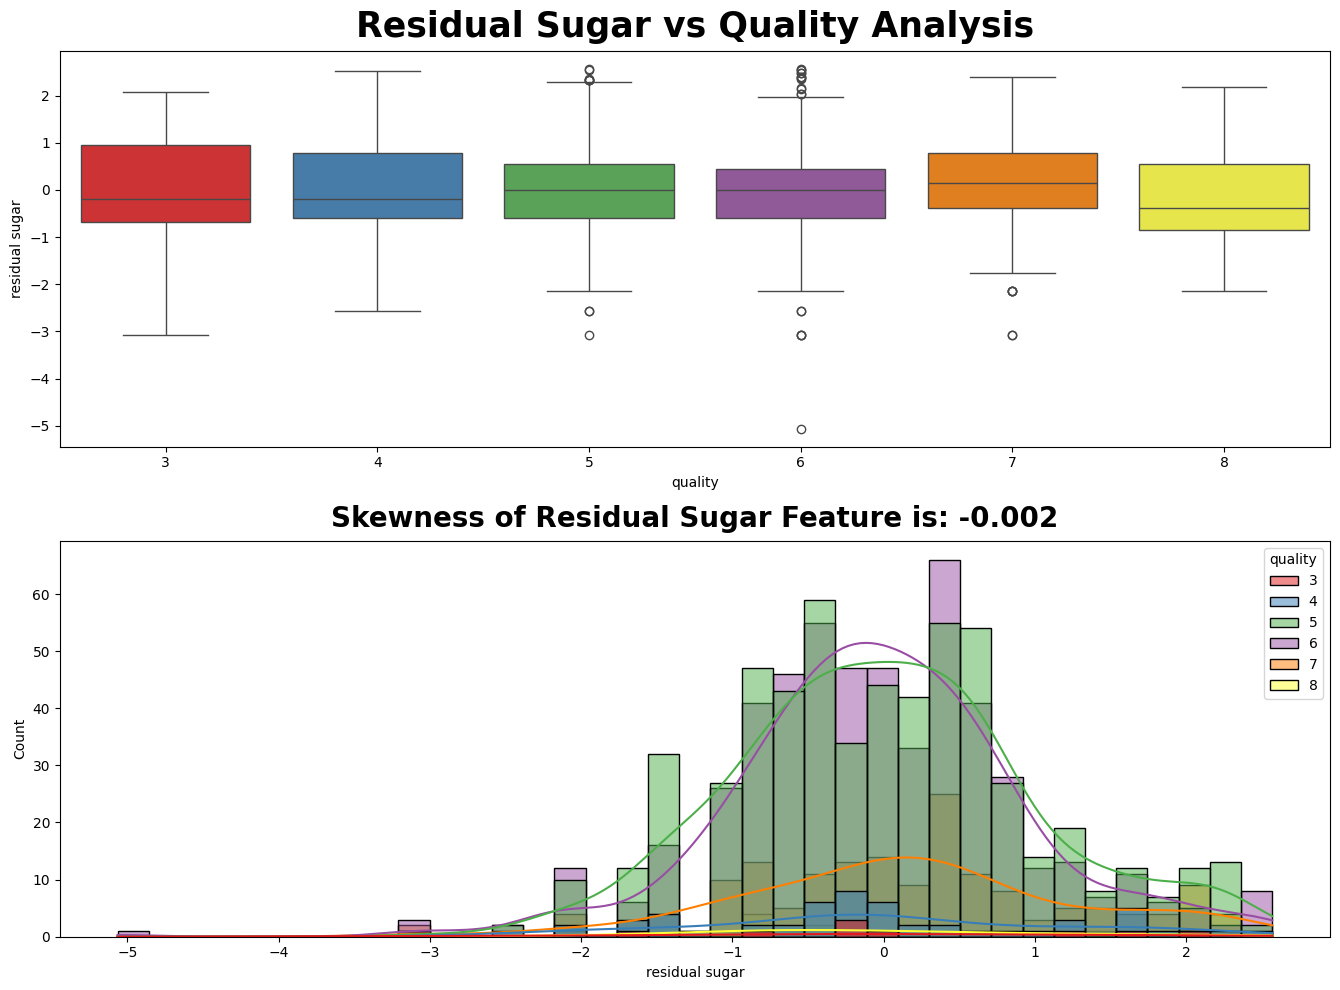

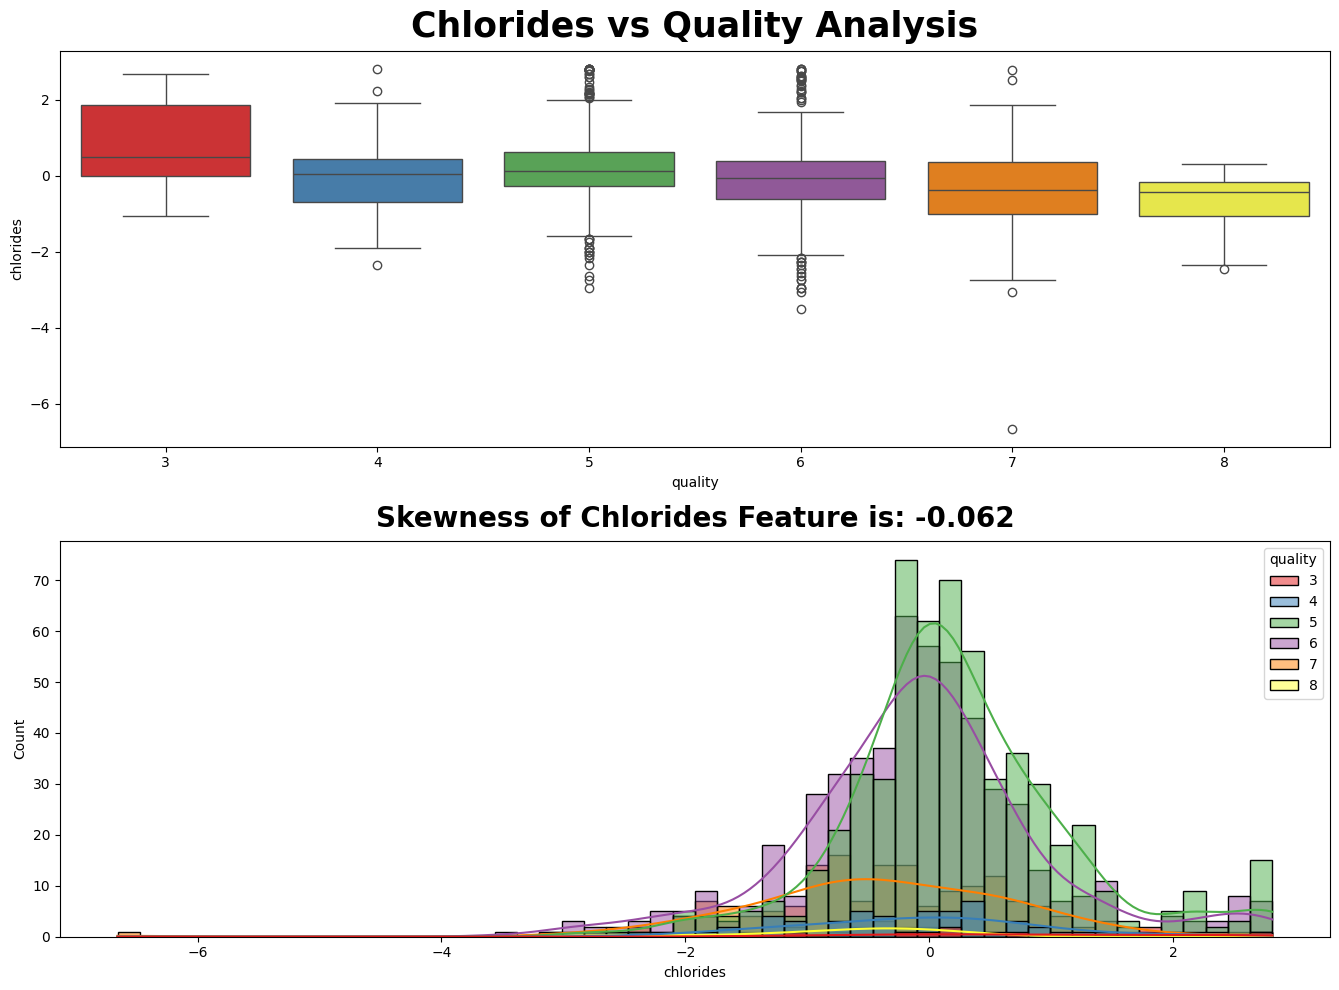

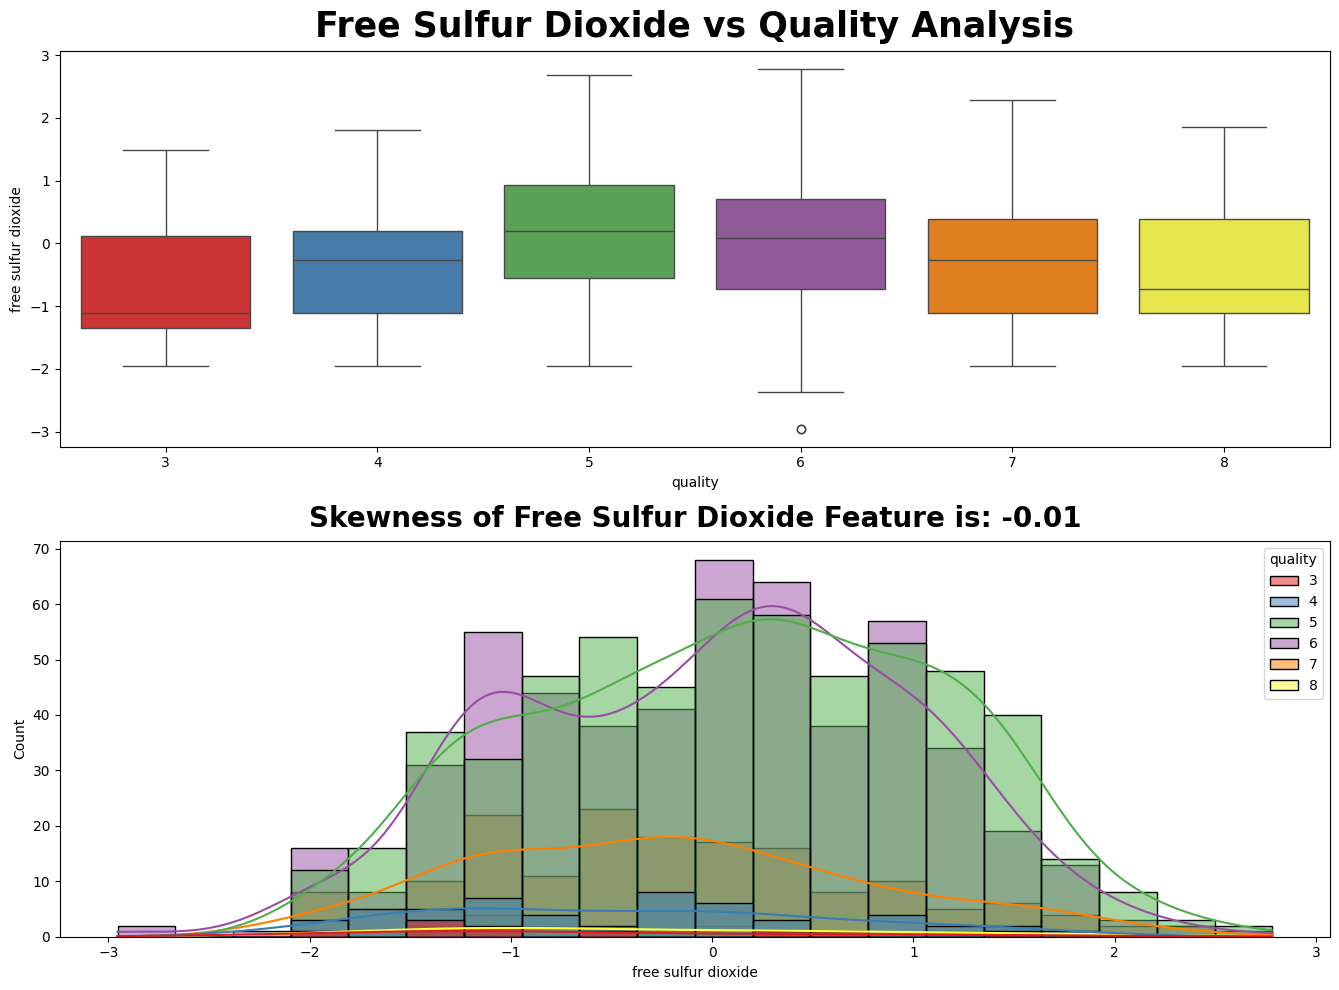

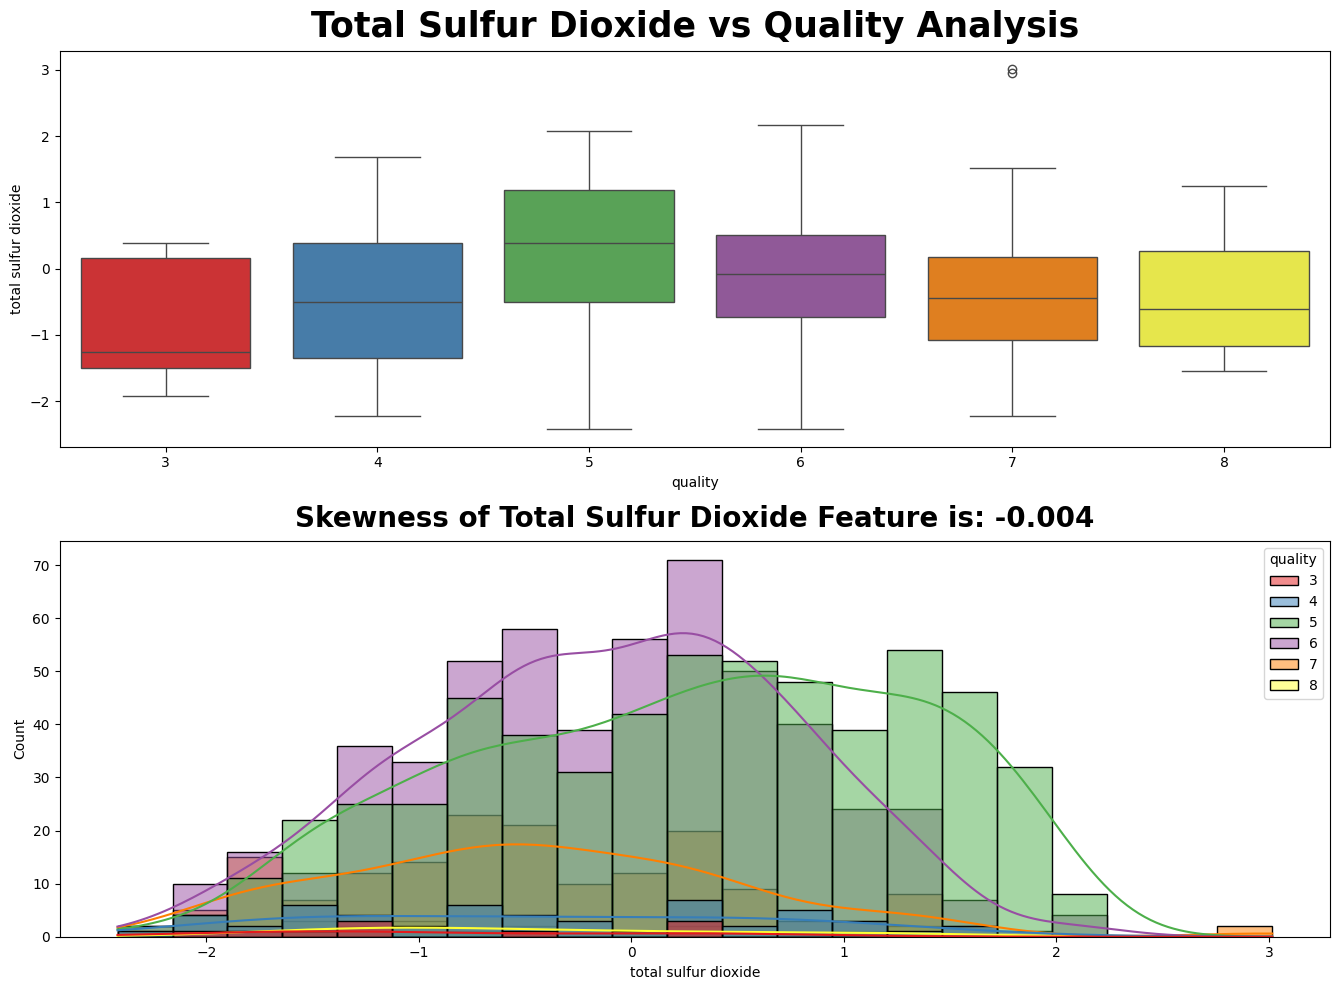

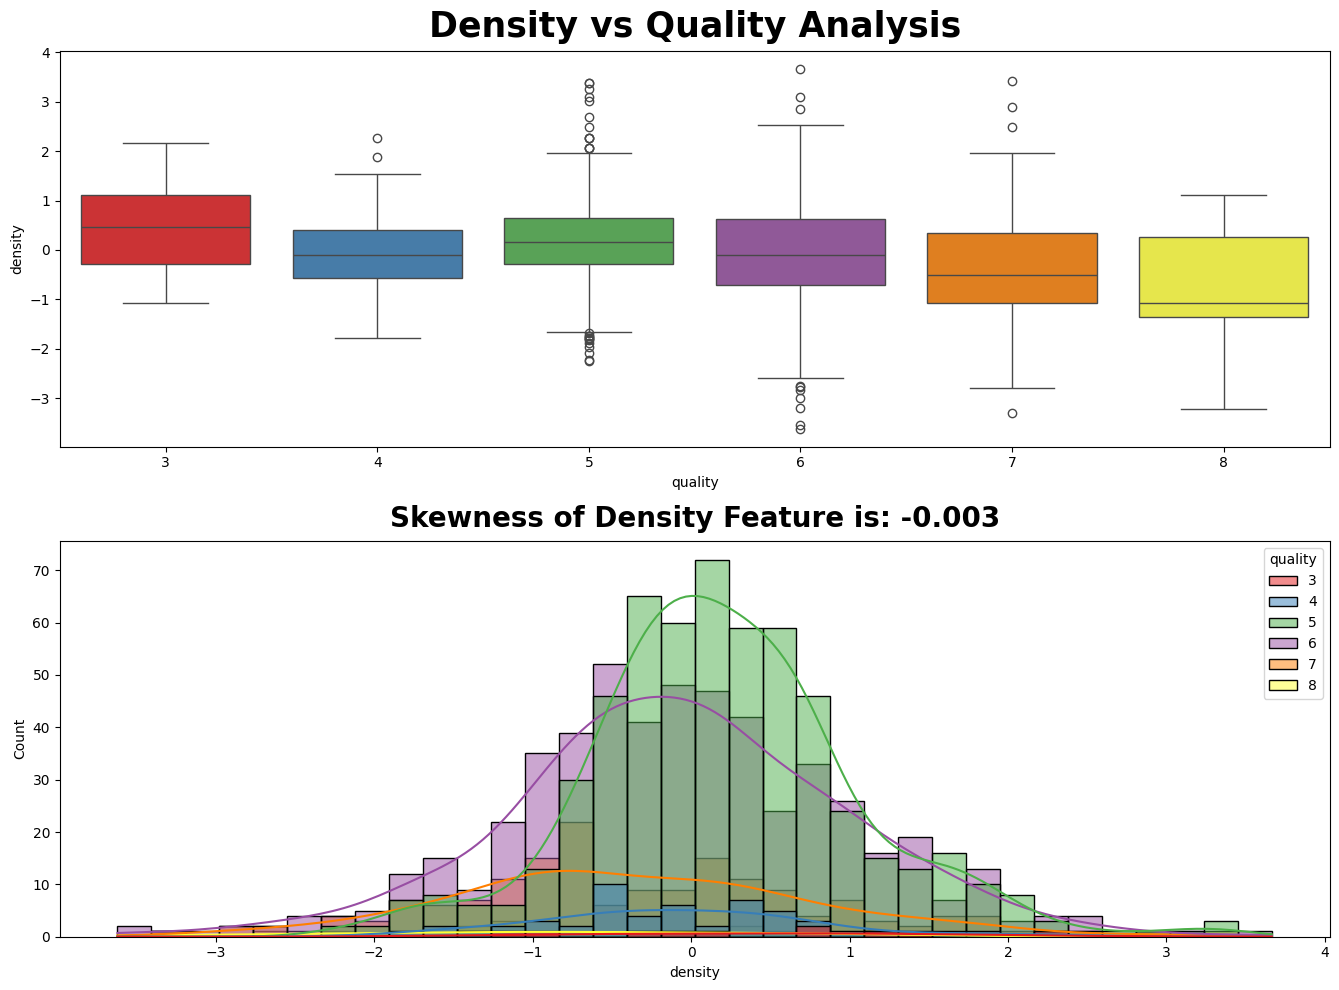

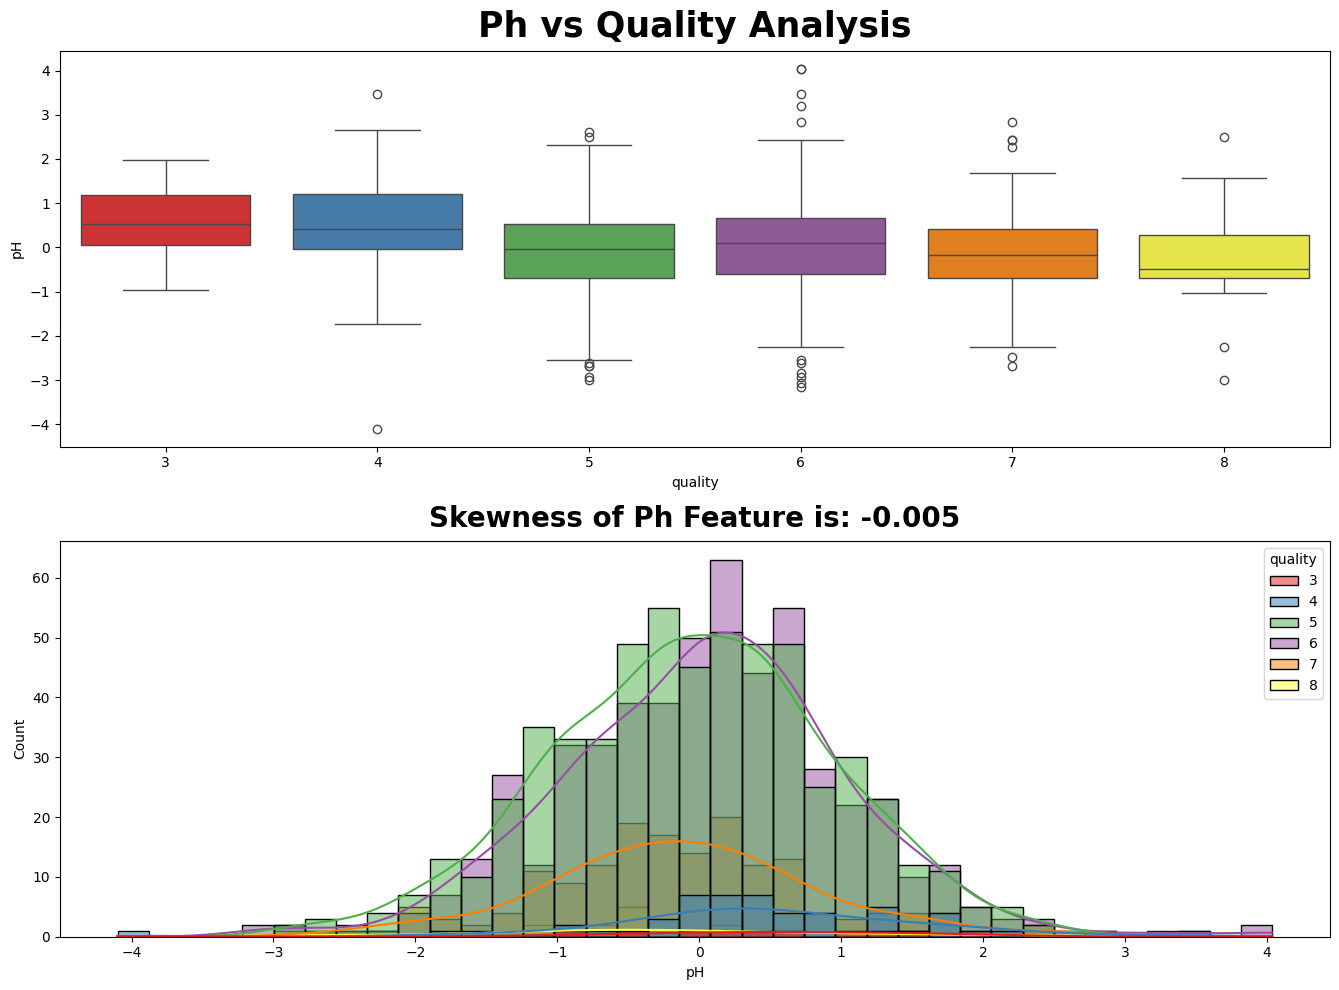

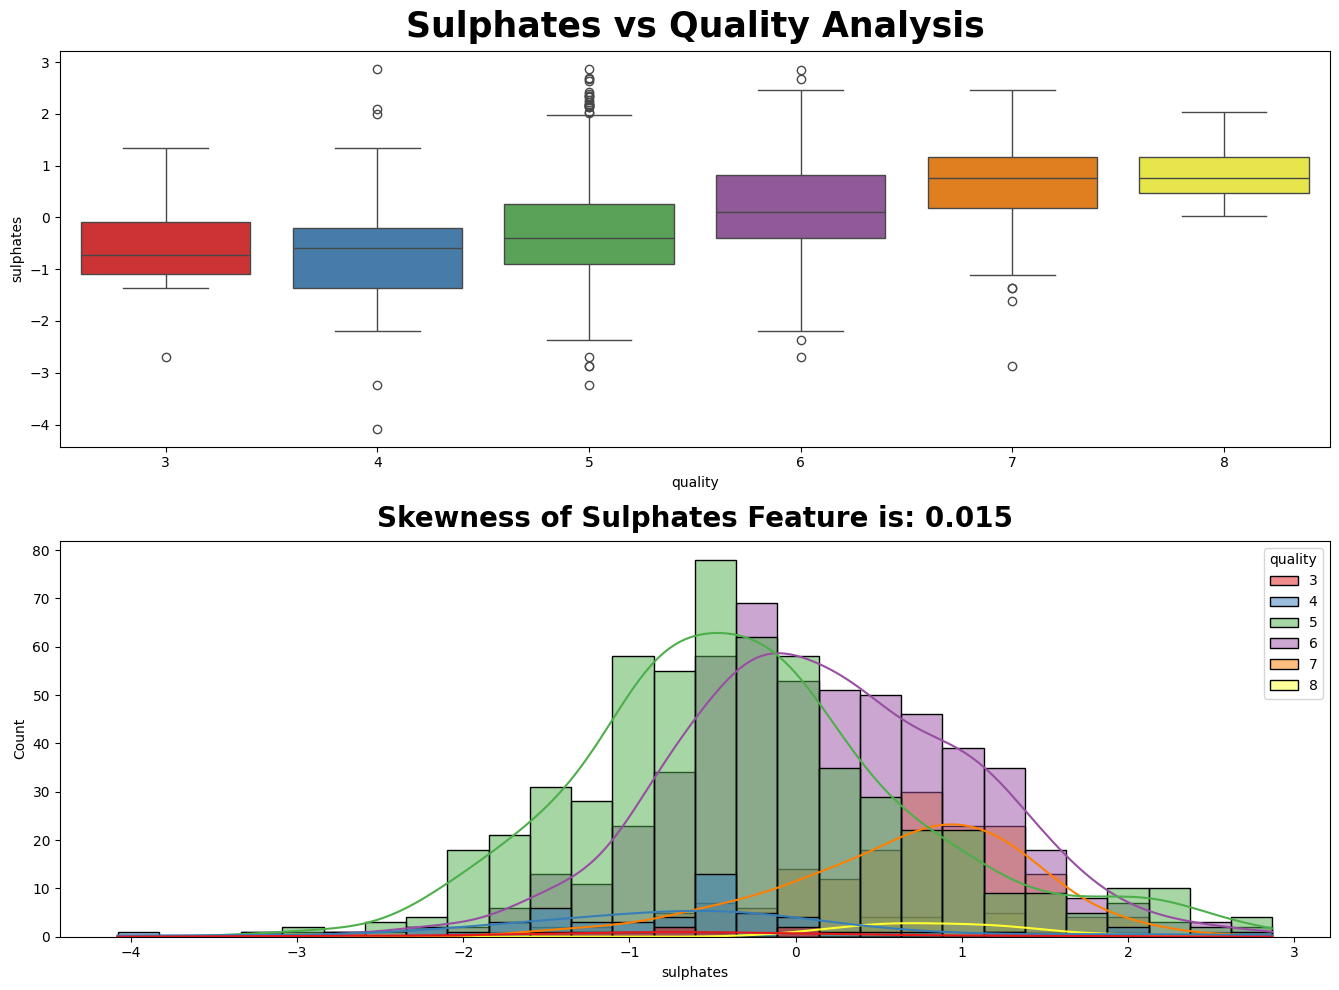

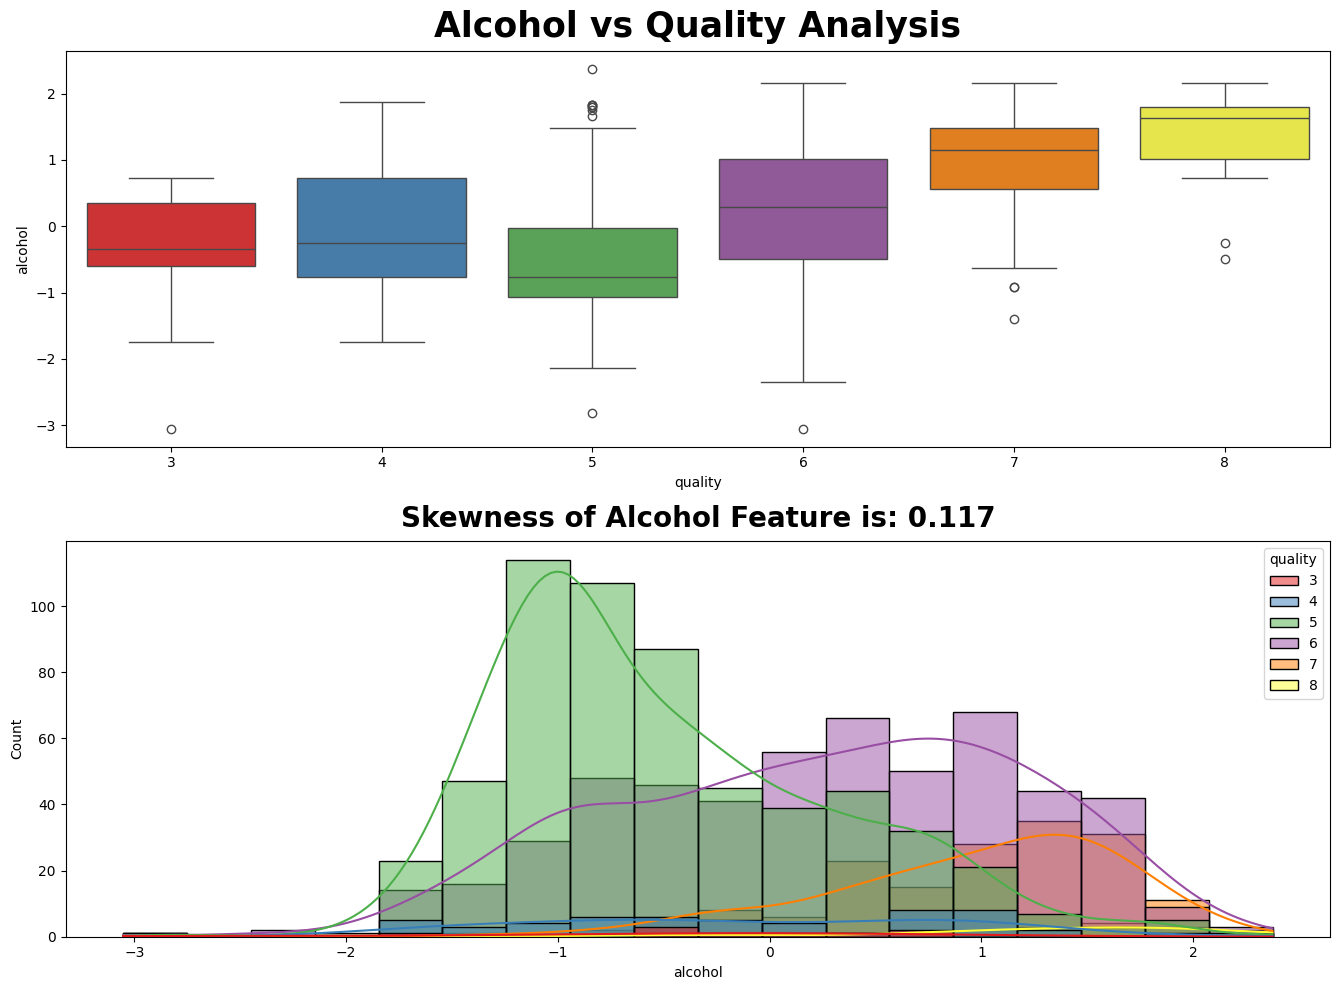

In [678]:
for col in columns:
    numerical_plot(col)
    

# Lets have a look at our target variable

In [679]:
# Target Variable 
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

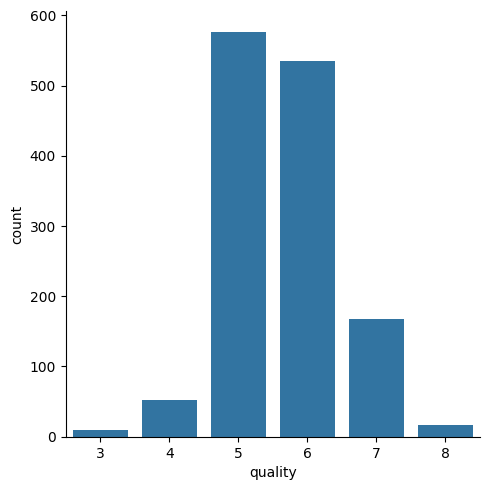

In [680]:
sns.catplot(df,x='quality',kind='count')

 > lets create this multi class outcomes into binary either 0 "Bad" or 1 "Good"  with a threshold of 7

In [681]:
df['quality'].value_counts()

quality
5    577
6    535
7    167
4     53
8     17
3     10
Name: count, dtype: int64

In [682]:
df['quality'] = df['quality'].apply(lambda x : 0 if x < 7 else 1)
df['quality'].value_counts()

quality
0    1175
1     184
Name: count, dtype: int64

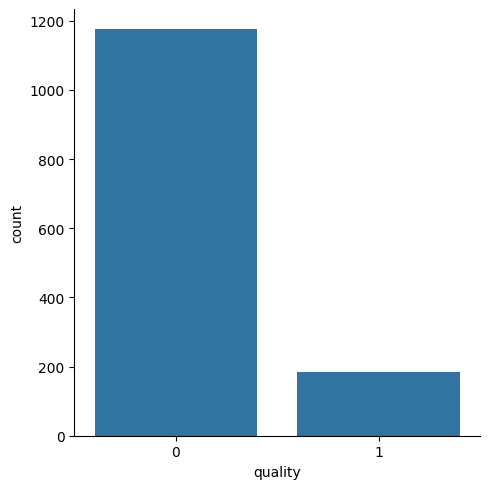

In [683]:
sns.catplot(df,x='quality',kind='count')

- Class is pretty imbalanced

  

# Data Preprocessing

Splitting Dataset using StratifiedKFold Method.

In [684]:
from sklearn.model_selection import StratifiedKFold

df2 = df.drop(columns="quality")
n_splits = 5  # Set the number of folds
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

for train_index, test_index in stratified_kfold.split(df2, df["quality"]):
    x_train, x_test = df2.iloc[train_index], df2.iloc[test_index]
    y_train, y_test = df["quality"].iloc[train_index], df["quality"].iloc[test_index]

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)    

(1088, 11) (1088,)
(271, 11) (271,)


# Apply SMOTE for class balancing

In [685]:
# !pip install imbalanced-learn --quiet

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)


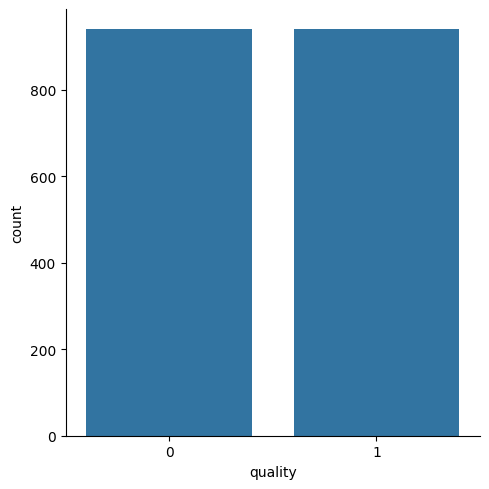

In [686]:
sns.catplot(x=y_train,kind='count')


# Feature selection

In [687]:
from sklearn.feature_selection import SelectKBest, f_classif

# feature selection using SelectKBest and ANOVA F-value
selector = SelectKBest(score_func=f_classif, k=5)
x_train_selected = selector.fit_transform(x_train, y_train)
x_test_selected = selector.transform(x_test)

# Get the selected feature names
selected_features = x.columns[selector.get_support(indices=True)].tolist()
print("Selected Features:", selected_features)



Selected Features: ['volatile acidity', 'citric acid', 'total sulfur dioxide', 'sulphates', 'alcohol']


> Note :
> - Dropping the features are reducing the model performance in this case. Therefor will not drop them

# Model Training and evaluation

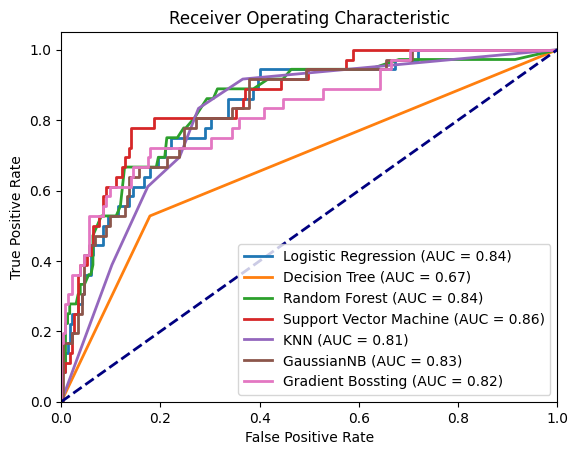

Logistic Regression
              precision    recall  f1-score   support

           0       0.95      0.77      0.85       235
           1       0.34      0.75      0.47        36

    accuracy                           0.77       271
   macro avg       0.65      0.76      0.66       271
weighted avg       0.87      0.77      0.80       271

AUC Score: 0.835933806146572

Decision Tree
              precision    recall  f1-score   support

           0       0.92      0.82      0.87       235
           1       0.31      0.53      0.39        36

    accuracy                           0.78       271
   macro avg       0.62      0.67      0.63       271
weighted avg       0.84      0.78      0.80       271

AUC Score: 0.6745271867612292

Random Forest
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       235
           1       0.42      0.53      0.47        36

    accuracy                           0.84       271
   macro avg       

In [698]:

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, roc_auc_score, roc_curve ,auc

# Define a dictionary of classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(probability=True,kernel='rbf'),
    'KNN': KNeighborsClassifier(),
    "GaussianNB" : GaussianNB(),
    "Gradient Bossting" : GradientBoostingClassifier()
}

# Train and evaluate each classifier
plt.figure()
results = {}
for name, classifier in classifiers.items():
    
    model = classifier.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_pred_proba = model.predict_proba(x_test)[:, 1]
    auc_score = roc_auc_score(y_test, y_pred_proba)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')
    results[name] = {
        "y_pred": y_pred,
        "y_pred_proba": y_pred_proba,
        "auc_score": auc_score,
        "fpr": fpr,
        "tpr": tpr
    }
# Plot the ROC curve
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Print classification report and AUC scores
for name, result in results.items():
    print(name)
    print(classification_report(y_test, result["y_pred"]))
    print("AUC Score:", result["auc_score"])
    print()

## - `Looking at the AUC scores SVM is our best performing model`

# Hyperparameter Tunning

In [689]:
from sklearn.model_selection import GridSearchCV
param_grid= {
    'C': [0.1, 1.0, 10.0],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto'],
}
    

clf = GridSearchCV(SVC(), param_grid)
clf.fit(x_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1.0, 10.0], 'degree': [2, 3, 4],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [690]:
clf.best_params_

{'C': 10.0, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}

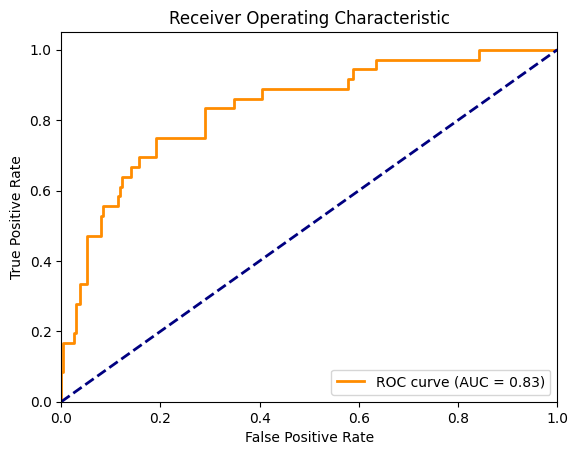

In [691]:
# Classifier with best parameters
classifier = SVC(C=10,degree=2,gamma='auto',kernel='rbf',probability=True)
model = classifier.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred_proba = model.predict_proba(x_test)[:, 1]
auc_score = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


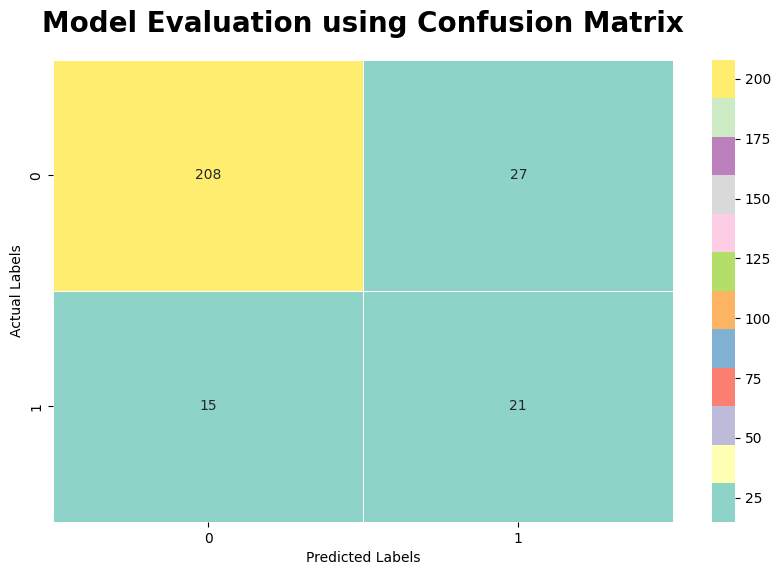

In [697]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,6))
sns.heatmap(data=cm, linewidth=.5, annot=True, fmt="g", cmap="Set3")
plt.title("Model Evaluation using Confusion Matrix",fontsize=20,pad=20,fontweight="black")
plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")
plt.show()